# Flood prediction Model

In [1]:
#Import some basic libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Data Insight

In [2]:
#Read the data present in dataset
data = pd.read_csv('kerala.csv')
#Using data.head() we can see the top 5 rows of the dataset
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [3]:
#Now we will cheak if any colomns is left empty
data.apply(lambda x:sum(x.isnull()), axis=0)

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

Hence there is no null values


In [4]:
#We want the data in numbers, therefore we will replace the yes/no in floods coloumn by 1/0
data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)

In [5]:
#Let's see how are data looks like now
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


In [6]:
#Now let's seperate the data which we are gonna use for prediction
x = data.iloc[:,1:14]
x.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [7]:
#Now seperate the flood label from the dataset
y = data.iloc[:, -1]
y.head()

0    1
1    1
2    1
3    1
4    0
Name: FLOODS, dtype: int64

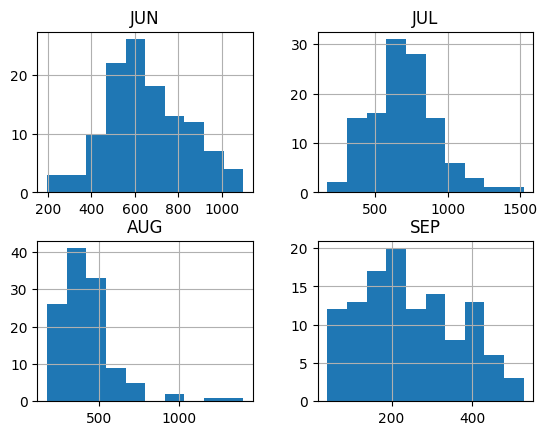

In [8]:
#Let's see hoe the rainfall index vary during rainy season
import matplotlib.pyplot as plt
%matplotlib inline
c = data[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()

In [9]:
#Data might be widely distributed so let's scale it between 0 and 1
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.        , 0.34371257, 0.56582278, ..., 0.39727673, 0.95570189,
        0.2388724 ],
       [0.00854701, 0.08023952, 0.03291139, ..., 0.5804966 , 0.37952709,
        0.60039565],
       [0.01709402, 0.03832335, 0.23544304, ..., 0.57188626, 0.37563604,
        0.29129575],
       ...,
       [0.98290598, 0.02874251, 0.04810127, ..., 0.31517821, 0.28105358,
        0.11622156],
       [0.99145299, 0.02275449, 0.08607595, ..., 0.24809772, 0.18258007,
        0.18793274],
       [1.        , 0.34850299, 0.65949367, ..., 0.57589107, 0.28105358,
        0.3214639 ]])

In [10]:
#Let's divide the dataset into 2 sets:train and test in ratio (4:1)
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
#Let's see how our train set looks like
x_train.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
44,1945,4.4,9.9,12.7,104.1,53.4,549.8,704.0,351.8,110.9,253.8,259.5,18.0
12,1913,3.1,5.2,20.7,75.7,198.8,541.7,763.2,247.2,176.9,422.5,109.9,45.8
15,1916,0.0,7.8,22.0,82.4,199.0,920.2,513.9,396.9,339.3,320.7,134.3,8.9
70,1971,31.6,18.5,20.0,113.0,317.5,889.6,648.6,385.2,331.2,220.9,38.3,62.3
107,2008,0.8,30.3,217.2,108.4,81.2,469.9,505.1,349.0,347.0,343.4,55.4,17.0


In [12]:
y_train.head()

44     0
12     0
15     1
70     1
107    0
Name: FLOODS, dtype: int64

# Prediction Algorithms:

# 1. KNN Classifier

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Assuming x_train, y_train, x_test, y_test are defined

# Create KNN classifier
clf = neighbors.KNeighborsClassifier()

# Fit the model on the training data
knn_clf = clf.fit(x_train, y_train)

In [14]:
# Let's predict chances of flood
y_predict = knn_clf.predict(x_test)
print('Predicted chances of flood:')
print(y_predict)

Predicted chances of flood:
[1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0]


In [15]:
#Actual chances of flood
print("actual values of floods:")
print(y_test)

actual values of floods:
56     1
89     0
4      0
45     1
26     1
116    0
69     0
10     0
90     1
73     0
18     1
111    0
11     1
96     1
42     1
31     1
88     0
0      1
97     1
109    1
64     0
40     1
95     0
53     1
Name: FLOODS, dtype: int64


In [16]:
knn_accuracy = cross_val_score(knn_clf,x_test,y_test,cv=3,scoring='accuracy',n_jobs=-1)

In [17]:
knn_accuracy.mean()

0.7916666666666666

# Hyper Parameter Testing for KNN

In [18]:
# Define the hyperparameters and their possible values
param_grid = {'n_neighbors': range(1, 21)}

In [19]:
# Create the GridSearchCV object
grid_search = GridSearchCV(knn_clf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

In [20]:
# Fit the grid search to the data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 21)}, scoring='accuracy')

In [21]:
# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

Best Parameters:  {'n_neighbors': 1}
Best Accuracy:  0.935483870967742


In [22]:
# Get the best KNN model
best_knn_model = grid_search.best_estimator_

In [23]:
# Predict using the best model
y_predict = best_knn_model.predict(x_test)

In [24]:
# Print the accuracy on the test set
test_accuracy = best_knn_model.score(x_test, y_test)
print("Test Set Accuracy: ", test_accuracy)

Test Set Accuracy:  0.7916666666666666


# 2. Logistic Regression

In [25]:
x_train_std = minmax.fit_transform(x_train)
x_test_std = minmax.transform(x_test)

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_clf = lr.fit(x_train_std,y_train)

lr_accuracy = cross_val_score(lr_clf,x_test_std,y_test,cv=3,scoring='accuracy',n_jobs=-1)

In [27]:
lr_accuracy.mean()

0.75

In [28]:
y_predict = lr_clf.predict(x_test_std)
print('Predicted chances of flood')
print(y_predict)

Predicted chances of flood
[0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0]


In [29]:
print('Actual chances of flood')
print(y_test.values)

Actual chances of flood
[1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1]


In [30]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score: %f"%(accuracy_score(y_test,y_predict)*100))
print("recall score: %f"%(recall_score(y_test,y_predict)*100))
print("roc score: %f"%(roc_auc_score(y_test,y_predict)*100))


accuracy score: 87.500000
recall score: 78.571429
roc score: 89.285714


# Hyper Parameter Testing

In [31]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

In [32]:
# Define the Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=0)

# Define the hyperparameters and their possible values
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Create the GridSearchCV object
grid_search = GridSearchCV(lr_classifier, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

In [33]:
# Fit the grid search to the data
grid_search.fit(x_train_std, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

Best Parameters:  {'C': 1}
Best Accuracy:  0.9254032258064516


In [34]:
# Getting the best Logistic Regression model
best_lr_model = grid_search.best_estimator_

# Predict using the best model
y_predict = best_lr_model.predict(x_test_std)

# Print the accuracy on the test set
test_accuracy = best_lr_model.score(x_test_std, y_test)
print("Test Set Accuracy: ", test_accuracy)

Test Set Accuracy:  1.0


# 3. Decision tree classification

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)
dtc_clf_acc = cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
dtc_clf_acc

array([0.78125   , 0.64516129, 0.77419355])

In [36]:
#Predicted flood chances
y_pred = dtc_clf.predict(x_test)
print(y_pred)

[1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1]


In [37]:
#Actual flood chances
print("actual values:")
print(y_test.values)

actual values:
[1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1]


In [38]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))


accuracy score:79.166667
recall score:78.571429
roc score:79.285714


# Hyper parameter Testing

In [39]:
# Define the hyperparameters and their possible values
param_grid = {'max_depth': range(1, 21)} 

In [40]:
# Create the GridSearchCV object
grid_search = GridSearchCV(dtc_clf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

In [41]:
# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

Best Parameters:  {'max_depth': 4}
Best Accuracy:  0.744287634408602


In [42]:
# Get the best Decision Tree model
best_dt_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_dt_model.predict(x_test)

# Print the accuracy on the test set
test_accuracy = best_dt_model.score(x_test, y_test)
print("Test Set Accuracy: ", test_accuracy)

Test Set Accuracy:  0.7916666666666666


# 4. Random Forest Classification

In [43]:
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=3,random_state=0)
rmf_clf = rmf.fit(x_train,y_train)
rmf_clf

RandomForestClassifier(max_depth=3, random_state=0)

In [44]:
rmf_clf_acc = cross_val_score(rmf_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
#rmf_proba = cross_val_predict(rmf_clf,x_train_std,y_train,cv=3,method='predict_proba')

In [45]:
rmf_clf_acc

array([0.875     , 0.77419355, 0.83870968])

In [46]:
y_pred = rmf_clf.predict(x_test)

In [47]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))


accuracy score:75.000000
recall score:71.428571
roc score:75.714286


# Hyper Parameter Testing

In [48]:
# Define the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameters and their possible values
param_grid = {'n_estimators': [50, 100, 150, 200], 'max_depth': [3, 5, 7, None]} 

In [49]:
# Create the GridSearchCV object
grid_search = GridSearchCV(rf_classifier, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, None],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [50]:
# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Get the best Random Forest model
best_rf_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_rf_model.predict(x_test)

Best Parameters:  {'max_depth': 7, 'n_estimators': 50}
Best Accuracy:  0.8511424731182795


In [51]:
# Print the accuracy on the test set
test_accuracy = best_rf_model.score(x_test, y_test)
print("Test Set Accuracy: ", test_accuracy)

Test Set Accuracy:  0.9166666666666666


# 5. Enseble Learning

In [52]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
knn_clf = KNeighborsClassifier()

voting = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf)],
    voting='hard')

In [53]:
voting_clf = voting.fit(x_train, y_train)

In [54]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, knn_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9583333333333334
RandomForestClassifier 0.75
KNeighborsClassifier 0.8333333333333334
VotingClassifier 0.9166666666666666


# Comparing all the prediction models

In [55]:
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('EL', VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf)],
    voting='hard')))


names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.833333
1   LR  0.958333
2   DT  0.833333
3   RF  0.916667
4   EL  0.916667


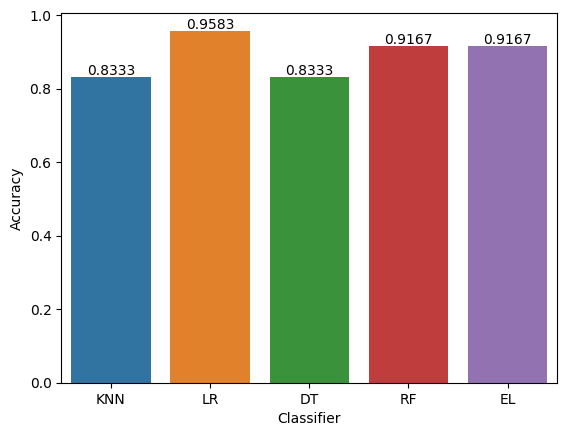

In [56]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

# As we can observe and Compare different Models and Logistic Regression Have the highest accuracy amoung all the Algorithms